# Curso de Manejo de Datos Faltantes: Imputación

[![Curso creado por jvelezmagic](https://img.shields.io/badge/Desarrollado%20por-%40jvelezmagic-blue?&style=for-the-badge&logo=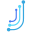)](https://jvelezmagic.com/)

![Curso de Manejo de Datos Faltantes: Exploración](course-logo.jpg)

## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib missingno nhanes pandas scipy seaborn session-info sklearn statsmodels upsetplot
```

or 

```bash
pip install -r requirements.txt
```

## Importar librerías

In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import nhanes.load
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import session_info
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic

## Importar funciones personalizadas

In [2]:
import os
os.getcwd()

'C:\\Users\\Mateo\\Documents\\Programacion\\Platzi\\Data Scientist\\Datos_Faltantes\\Imputacion'

In [3]:
%run pandas-missing-extension.ipynb

## Configurar el aspecto general de las gráficas del proyecto

In [4]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (8, 6)
    }
)

sns.set_style("whitegrid")

## El problema de trabajar con valores faltantes

In [5]:
airquality = sm.datasets.get_rdataset('airquality').data.clean_names(
    case_type = 'snake').add_column(
    'year',1973).assign(
    date = lambda df : pd.to_datetime(
        df[['year','month','day']])).sort_values(by='date').set_index('date')


In [6]:
airquality

,ozone,solar_r,wind,temp,month,day,year
date,,,,,,,
1973-05-01,41.0,190.0,7.4,67,5,1,1973
1973-05-02,36.0,118.0,8.0,72,5,2,1973
1973-05-03,12.0,149.0,12.6,74,5,3,1973
1973-05-04,18.0,313.0,11.5,62,5,4,1973
1973-05-05,NaN,NaN,14.3,56,5,5,1973
...,...,...,...,...,...,...,...
1973-09-26,30.0,193.0,6.9,70,9,26,1973
1973-09-27,NaN,145.0,13.2,77,9,27,1973
1973-09-28,14.0,191.0,14.3,75,9,28,1973


In [7]:
airquality.isna().sum()

ozone      37
solar_r     7
wind        0
temp        0
month       0
day         0
year        0
dtype: int64

In [12]:
#Predecir la temp ocn base en el ozono
smf.ols(formula='temp ~ ozone',data=airquality).fit().summary().tables[0]

Dep. Variable:,temp,R-squared:,0.488
Model:,OLS,Adj. R-squared:,0.483
Method:,Least Squares,F-statistic:,108.5
Date:,"Wed, 25 Jan 2023",Prob (F-statistic):,2.93e-18
Time:,10:14:37,Log-Likelihood:,-386.27
No. Observations:,116,AIC:,776.5
Df Residuals:,114,BIC:,782.1
Df Model:,1,,
Covariance Type:,nonrobust,,


In [17]:
smf.ols(formula = 'temp ~ ozone + solar_r',data=airquality).fit().summary().tables[0]

Dep. Variable:,temp,R-squared:,0.491
Model:,OLS,Adj. R-squared:,0.481
Method:,Least Squares,F-statistic:,52.07
Date:,"Wed, 25 Jan 2023",Prob (F-statistic):,1.47e-16
Time:,10:16:13,Log-Likelihood:,-369.78
No. Observations:,111,AIC:,745.6
Df Residuals:,108,BIC:,753.7
Df Model:,2,,
Covariance Type:,nonrobust,,


## ¿Se podría comparar un OLS si uno tiene un número de observaciones diferente a otro?
No. Ambos deben estar ajustados a partir de las mismas filas.

### Reto: Datos de supervivientes

In [18]:
survival = sm.datasets.get_rdataset("flchain", "survival").data
survival

,age,sex,sample.yr,kappa,lambda,flc.grp,creatinine,mgus,futime,death,chapter
0,97,F,1997,5.700,4.860,10,1.7,0,85,1,Circulatory
1,92,F,2000,0.870,0.683,1,0.9,0,1281,1,Neoplasms
2,94,F,1997,4.360,3.850,10,1.4,0,69,1,Circulatory
3,92,F,1996,2.420,2.220,9,1.0,0,115,1,Circulatory
4,93,F,1996,1.320,1.690,6,1.1,0,1039,1,Circulatory
...,...,...,...,...,...,...,...,...,...,...,...
7869,52,F,1995,1.210,1.610,6,1.0,0,4997,0,NaN
7870,52,F,1999,0.858,0.581,1,0.8,0,3652,0,NaN
7871,54,F,2002,1.700,1.720,8,NaN,0,2507,0,NaN
7872,53,F,1995,1.710,2.690,9,NaN,0,4982,0,NaN


<AxesSubplot: >

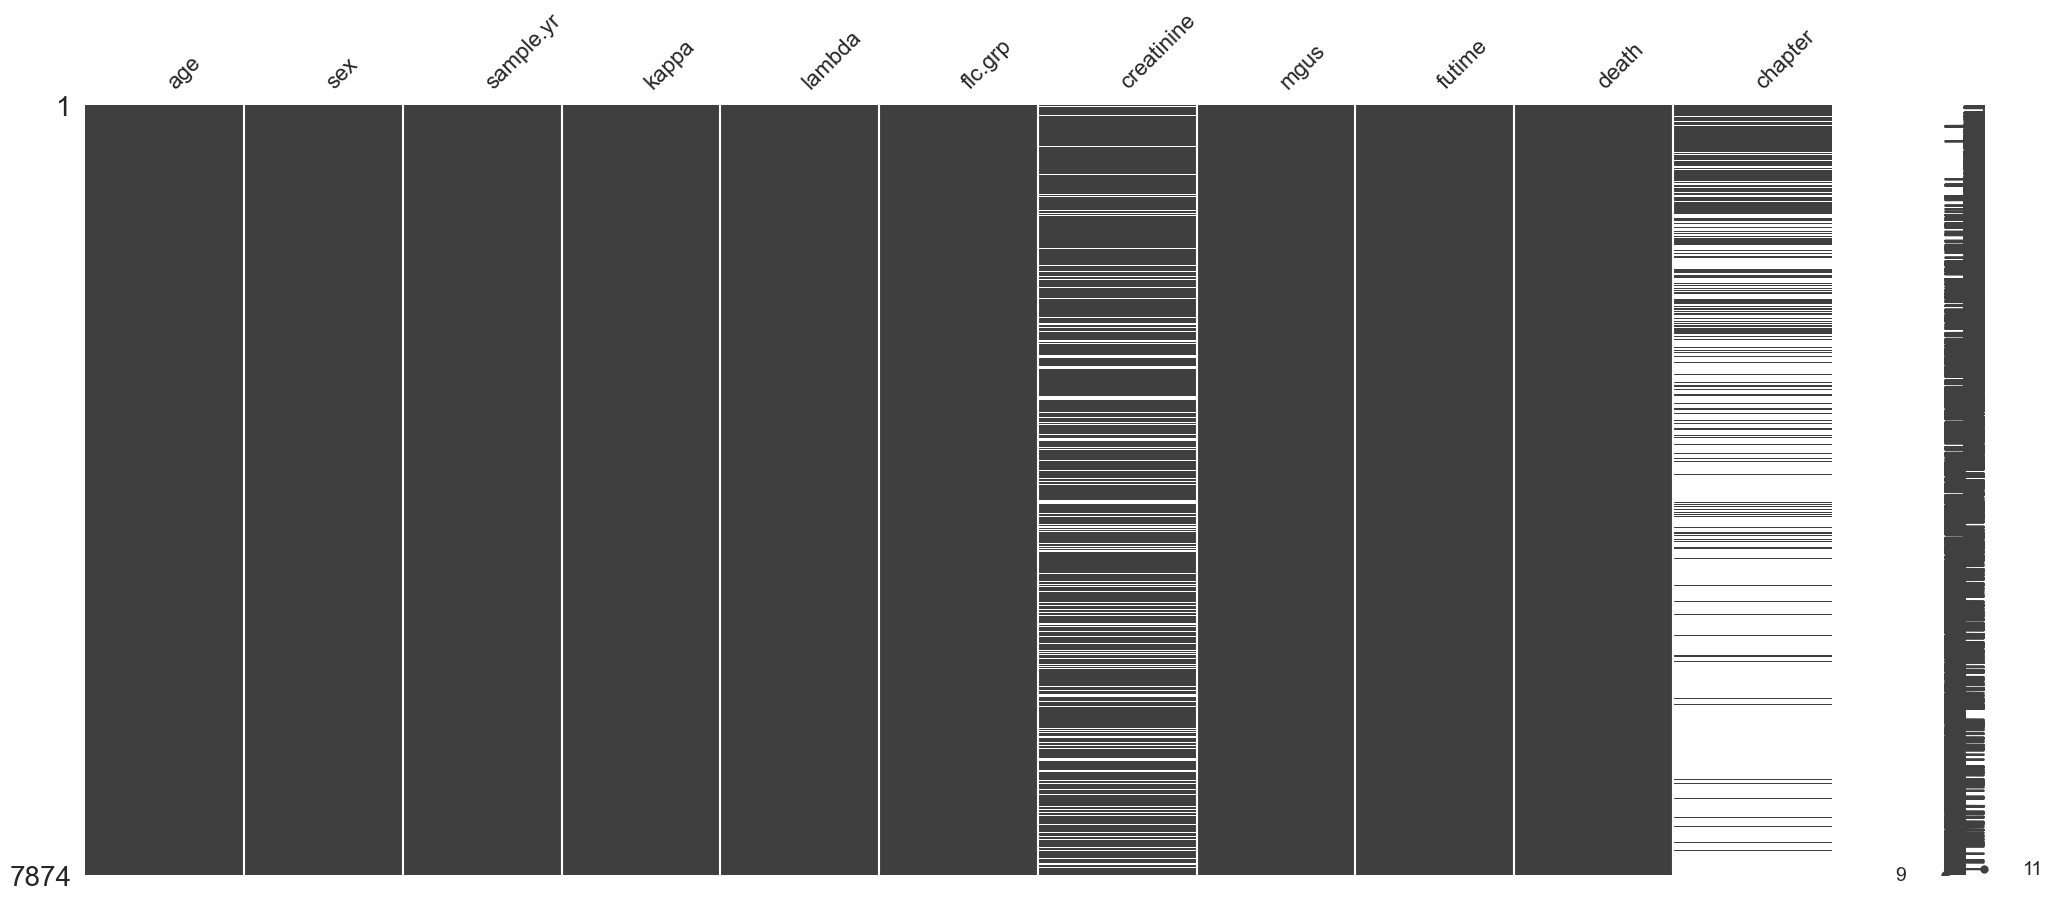

In [22]:
missingno.matrix(df=survival)

<AxesSubplot: >

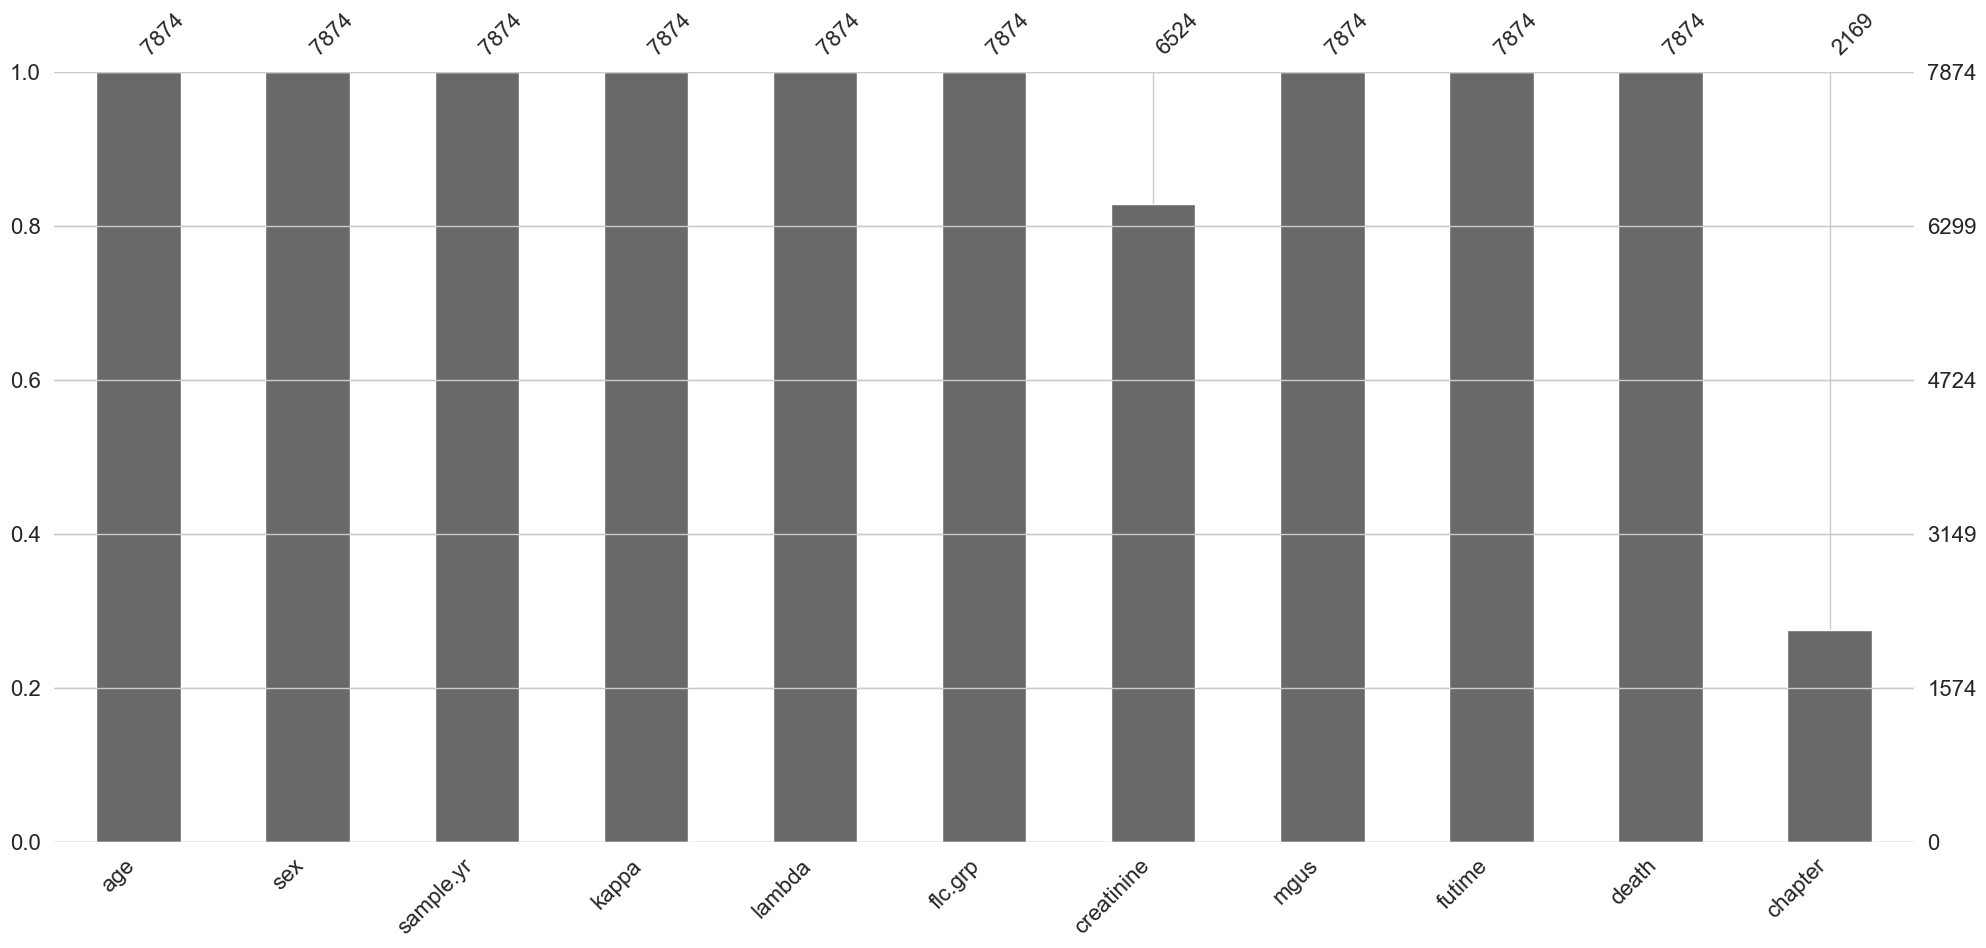

In [25]:
missingno.bar(df=survival)

In [26]:
survival.isna().sum()

age              0
sex              0
sample.yr        0
kappa            0
lambda           0
flc.grp          0
creatinine    1350
mgus             0
futime           0
death            0
chapter       5705
dtype: int64

Ajusta algunos modelos utilizando a las variables con valores faltantes como predictoras. ¿Qué sucede?

In [37]:
smf.ols(formula='death ~ futime + age + creatinine',data=survival).fit().summary().tables[0]

Dep. Variable:,death,R-squared:,0.545
Model:,OLS,Adj. R-squared:,0.544
Method:,Least Squares,F-statistic:,2598.
Date:,"Wed, 25 Jan 2023",Prob (F-statistic):,0.00
Time:,10:24:26,Log-Likelihood:,-1605.6
No. Observations:,6524,AIC:,3219.
Df Residuals:,6520,BIC:,3246.
Df Model:,3,,
Covariance Type:,nonrobust,,


In [31]:
smf.ols(formula='death ~ age',data=survival).fit().summary().tables[0]

Dep. Variable:,death,R-squared:,0.287
Model:,OLS,Adj. R-squared:,0.287
Method:,Least Squares,F-statistic:,3172.
Date:,"Wed, 25 Jan 2023",Prob (F-statistic):,0.00
Time:,10:23:20,Log-Likelihood:,-3495.2
No. Observations:,7874,AIC:,6994.
Df Residuals:,7872,BIC:,7008.
Df Model:,1,,
Covariance Type:,nonrobust,,


## Preparando datos: _National Health and Nutrition Examination Survey_

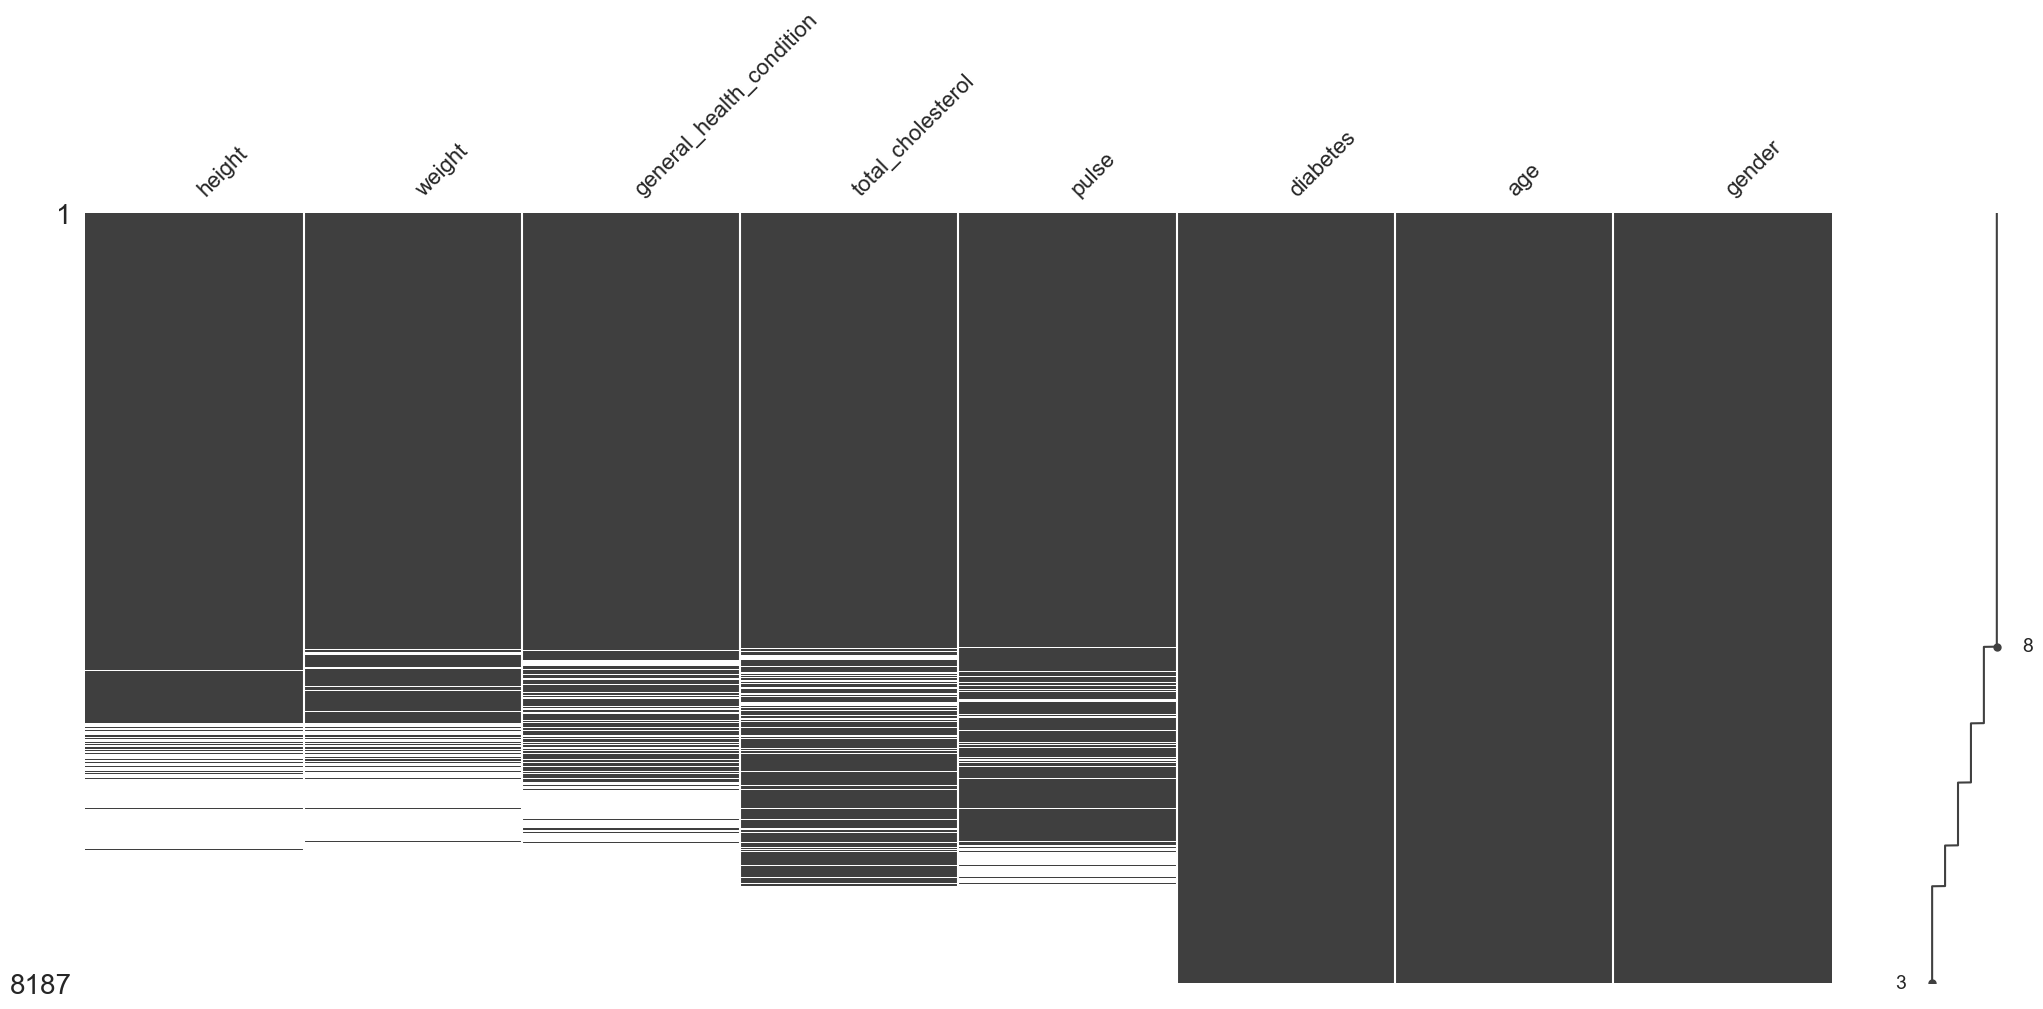

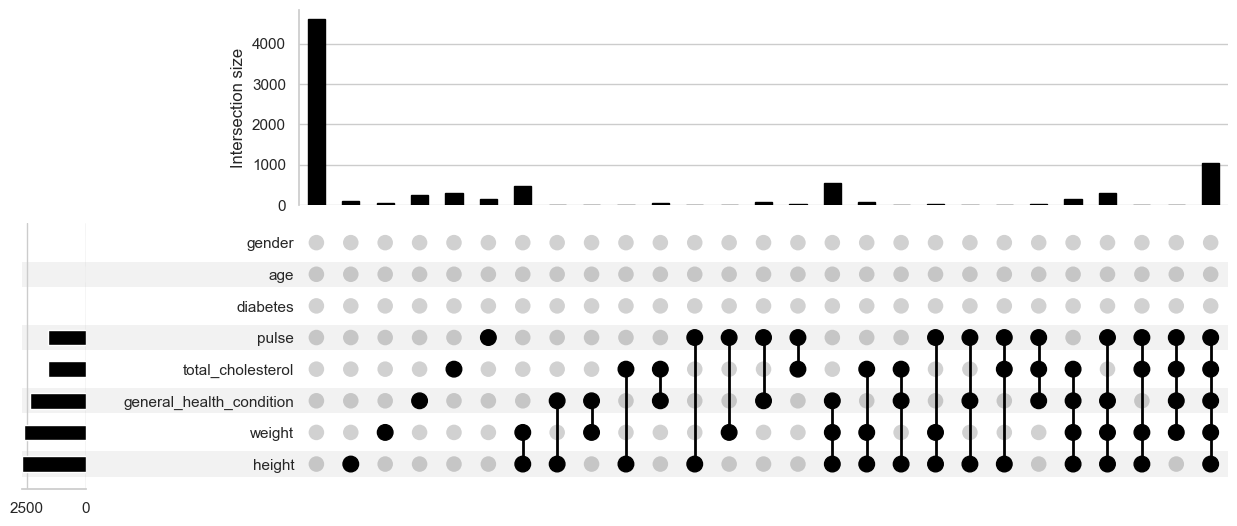

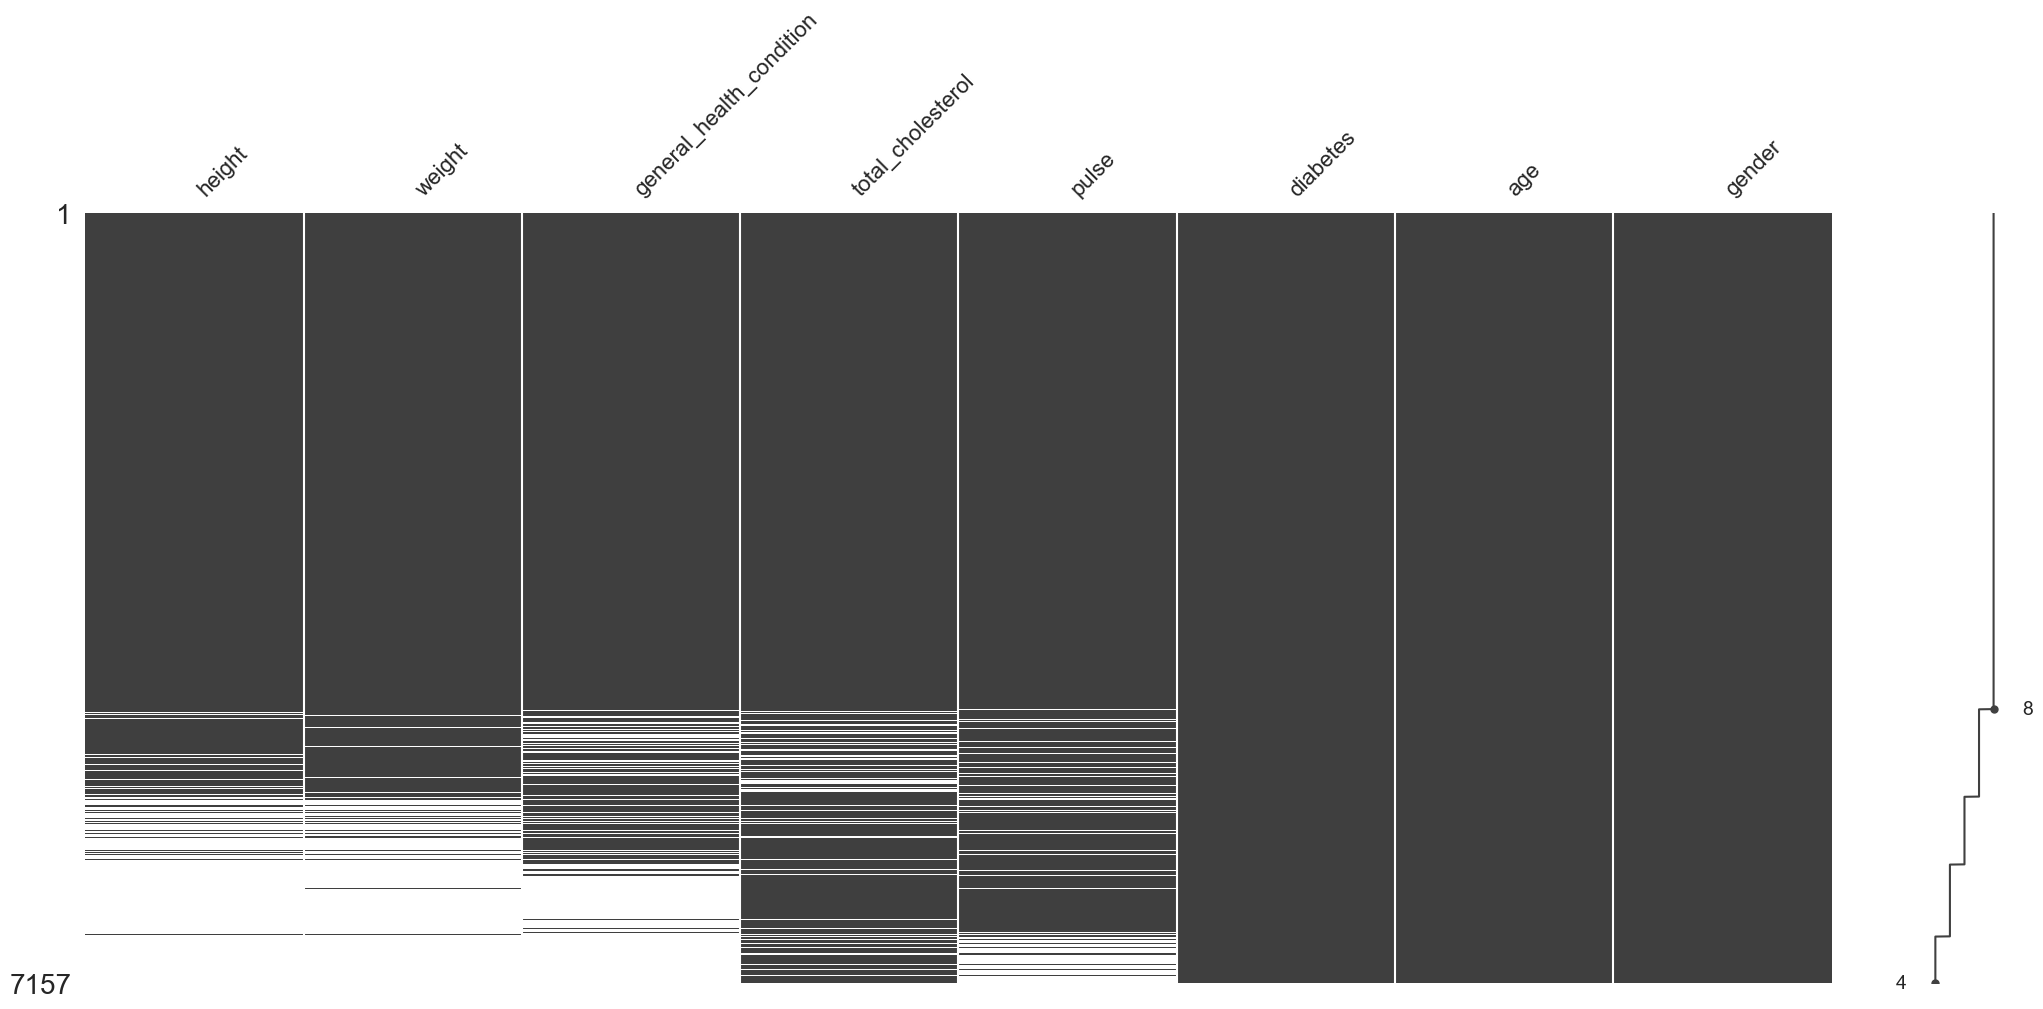

In [38]:
%run download-data-and-load-it.ipynb

## Consideración y evaluación de los distintos tipos de valores faltantes

![](missing_data_action.jpeg)

## Evaluación del mecanismo de valores faltantes por prueba de _t-test_

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
<code>two-sided</code>: las <b>medias</b> de las distribuciones subyacentes a las muestras son <b>desiguales</b>.<br>
<code>less</code>: la <b>media</b> de la distribución subyacente a la <b>primera</b> muestra es <b>menor</b> que la media de la distribución subyacente a la <b>segunda</b> muestra.<br>
<code>greater</code>: la <b>media</b> de la distribución subyacente a la <b>primera</b> muestra es <b>mayor</b> que la media de la distribución subyacente a la <b>segunda</b> muestra.<br>
    </p>
</div>

In [54]:
female_weight, male_weight = nhanes_df.select_columns(['gender','weight']).transform_column('weight', lambda x: x.isna(),
                                                              elementwise = False).groupby('gender').weight.pipe(lambda df:(df.get_group('Female'),df.get_group('Male')))
#La pregunta es: ¿Existe una diferencia entre la presencia o ausencia de valores de medición de peso por género?
#Si es mayor a 0.5 decimos que no
scipy.stats.ttest_ind(a = female_weight,b=male_weight,
                     alternative='two-sided')

Ttest_indResult(statistic=-0.3621032192538131, pvalue=0.7172855918077239)


La documentación del módulo ttest_ind está contenida [acá](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), es importante recalcar la definición:

*"Calculate the T-test for the means of two independent samples of scores.
This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default."*

Debido a que el resultado es 

`Ttest_indResult(statistic=-0.3621032192538131, pvalue=0.7172855918077239)`

con 

`pvalue > 0.5` 

**NO** podríamos rechazar la hipótesis nula. Es decir, que no podemos decir que exista una diferencia entre las personas que tienen un valor faltante.
Entonces los datos no están perdidos al azar para la categoría de género.

## Amplía tu conjunto de herramientas para explorar valores faltantes

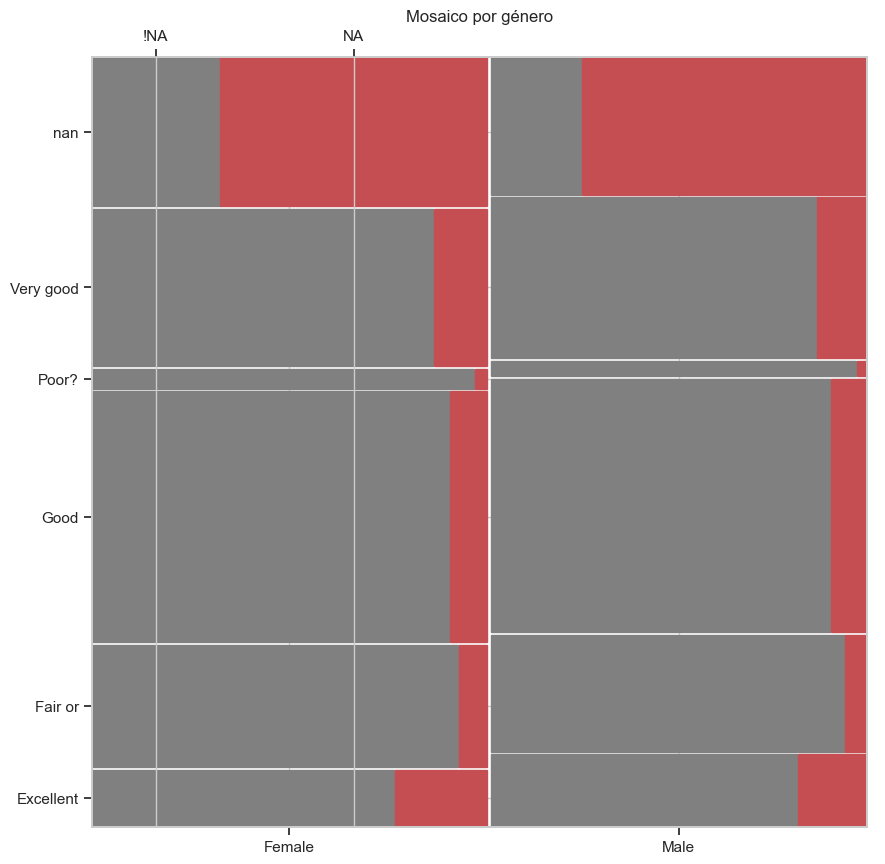

In [63]:
fig, ax = plt.subplots(figsize = (10,10))
nhanes_df.select_columns(['weight','general_health_condition','gender']).assign(
weight = lambda df: df.weight.isna().replace([True,False],['NA','!NA'])).groupby(['gender','general_health_condition','weight'],dropna=False,
                                                                                as_index=True).size().pipe(
lambda df: mosaic(data = df,properties = lambda key: {'color':'r' if 'NA'in key else 'gray'},horizontal=True,
                 axes_label=True,title='Mosaico por género',
                 labelizer=lambda key: '',
                 ax = ax));

## Tratamiento de variables categóricas para imputación de valores faltantes

In [64]:
 dftnhanes = nhanes_df.copy(deep = True)

### Codificación ordinal

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
    Una codificación ordinal <b>implica</b> mapear cada etiqueta (categoría) única a un valor entero. A su vez, la codificación ordinal también es conocida como codificación entera.
    </p>
</div>

#### Ejemplo

Dado un conjunto de datos con dos características, encontraremos los valores únicos por cataracterística y los transformaremos utilizando una codificación ordinal.

In [67]:
encoder = sklearn.preprocessing.OrdinalEncoder()

X = [['Male'],['Female'],['Female']]
X

[['Male'], ['Female'], ['Female']]

In [68]:
encoder.fit_transform(X)

array([[1.],
       [0.],
       [0.]])

In [71]:
encoder.categories_

[array(['Female', 'Male'], dtype=object)]

In [76]:
encoder.inverse_transform([[0],[0],[1]])

array([['Female'],
       ['Female'],
       ['Male']], dtype=object)

#### Aplicando la codificación ordinal a todas tus variables categóricas

In [79]:
categorical_columns = nhanes_df.select_dtypes(include=[object,'category']).columns

In [85]:
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(),
                                        categorical_columns),remainder='passthrough')

### Paso de categórico a numérico usando el transformer de sklearn

In [92]:
nhanes_transformed_df = pd.DataFrame(categorical_transformer.fit_transform(nhanes_df),
            columns=categorical_transformer.get_feature_names_out(),
            index = nhanes_df.index).rename_columns(function=lambda x: x.removeprefix('ordinalencoder__')).rename_columns(
function= lambda x: x.removeprefix('remainder__'))
nhanes_transformed_df

,general_health_condition,gender,height,weight,total_cholesterol,pulse,diabetes,age
SEQN,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,2.0,1.0,NaN,NaN,189.0,100.0,0.0,13.0
93709.0,NaN,0.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


#### OrdinalEncoder

Está basado en una forma diferente
Género, forma, cambio del array y se devuelve al DF.

In [98]:
gender_encoder = sklearn.preprocessing.OrdinalEncoder()
gender_values = (nhanes_df.gender.values.reshape(-1,1))
gender_encoder.fit_transform(X=gender_values).squeeze()

nhanes_df.gender.unique()
nhanes_transformed_df.gender.unique()
gender_encoder.categories_

[array(['Female', 'Male'], dtype=object)]

### _One Hot Encoding_


Cuando se tiene una categoría de pregunta que se llena con 0 y 1.


¿Cuál es tu animal favorito?



|Perro|Gato|Beluga|Perezoso|Turritopsis nutricula|
|-|-|-|-|-|
|1|0|0|0|0|
|0|0|0|1|0|
|0|0|1|0|0|


Etc...

In [99]:
nhanes_transformed_df2 = nhanes_df.copy(deep = True)

### `pandas.get_dummies()` vs `skelearn.preprocessing.OneHotEncoder()`

#### `pandas.get_dummies()`

In [107]:
nhanes_transformed_df2.select_columns('general_health_condition').head(10).pipe(pd.get_dummies)

,general_health_condition_Fair or,general_health_condition_Good,general_health_condition_Very good
SEQN,,,
93705.0,0,1,0
93706.0,0,0,1
93707.0,0,1,0
93709.0,0,0,0
93711.0,0,0,1
93712.0,0,1,0
93713.0,0,0,1
93714.0,0,1,0
93715.0,1,0,0


#### `skelearn.preprocessing.OneHotEncoder()`

In [110]:
transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(),['gender']),
                                                      (sklearn.preprocessing.OneHotEncoder(),['general_health_condition']),remainder='passthrough')

In [118]:
nhanes_transformed_df2 = pd.DataFrame(transformer.fit_transform(nhanes_df),
            columns=transformer.get_feature_names_out(),
            index = nhanes_df.index).rename_columns(function=lambda x: x.removeprefix('ordinalencoder__')).rename_columns(
function= lambda x: x.removeprefix('remainder__')).rename_columns(function = lambda x: x.removeprefix('onehotencoder__'))
nhanes_transformed_df2

,gender,general_health_condition_Excellent,general_health_condition_Fair or,general_health_condition_Good,general_health_condition_Poor?,general_health_condition_Very good,general_health_condition_nan,height,weight,total_cholesterol,pulse,diabetes,age
SEQN,,,,,,,,,,,,,
93705.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,189.0,100.0,0.0,13.0
93709.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


In [120]:
transformer.named_transformers_.get('onehotencoder').categories_

[array(['Excellent', 'Fair or', 'Good', 'Poor?', 'Very good', nan],
       dtype=object)]

In [123]:
transformer.named_transformers_.get('onehotencoder').inverse_transform(X=[[0,0,1,0,0,0]])

array([['Good']], dtype=object)

#### Onehotencoding:
Útil cuando sae tiene una cantidad enorme de categorías. Por ejemplo, tener 1000, 2000 categorías con un dummy serían 2000 números distintos. Es más preciso el One Hot

#### Dummies:
Útil cuando se trabaja con un número menor de categorías

## Tipos de imputación de valores faltantes

![](imputation_methods.png)

* Donante: completa los valores copiando los valores observando otra unidad.
* Modelos: el objeetivo es encontrar un modelo predictivo para cada variable objetivo en el conjunto de datos que contiene valores faltantes.

## Imputación de un único valor (media, mediana, moda)

* Pros:  Rápido, la media puede ser útil con outliers, no afectará el estadístico en cuestión ni el tamaño de muestra

* Cons: Puede sesgar los resultados, dado que motidica la curtosis; pierde correlaciones entre variables y no es preciso, no puede usar variables categóricas a excepción de la moda.

In [130]:
nhanes_df.transform_column('height',lambda x: x.fillna(x.mean()),elementwise=False).height
#Lo que sea x es una columna nada más

SEQN
93705.0     63.00000
93706.0     68.00000
93707.0     66.25656
93709.0     62.00000
93711.0     69.00000
              ...   
102949.0    72.00000
102953.0    65.00000
102954.0    66.00000
102955.0    66.25656
102956.0    69.00000
Name: height, Length: 7157, dtype: float64

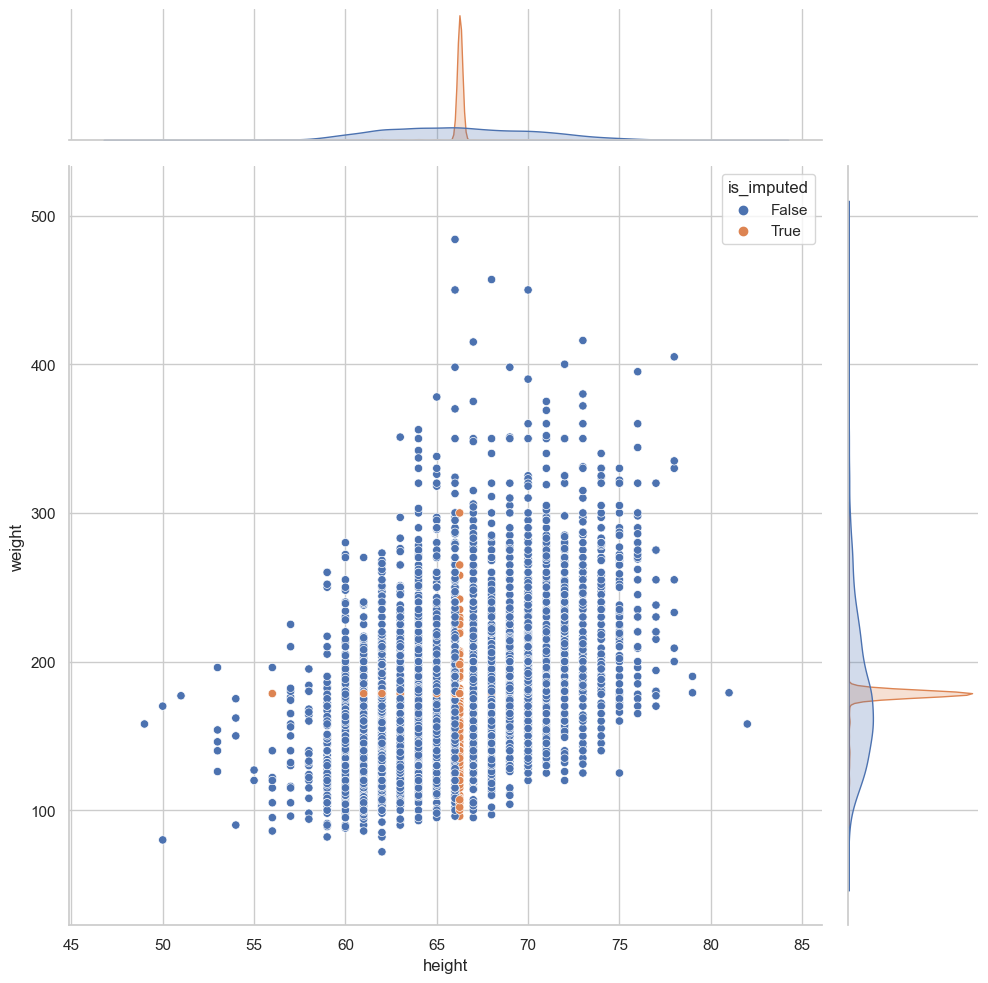

In [137]:
nhanes_df.select_columns('height','weight').missing.bind_shadow_matrix(True,False,suffix='_imp').assign( height = lambda df: df.height.fillna(value=df.height.mean()),
                                                                                                       weight = lambda df: df.weight.fillna(value=df.weight.mean())).missing.scatter_imputation_plot(
x='height',y='weight',show_marginal=True,height=10)

## Imputación por llenado hacia atrás e imputación por llenado hacia adelante

### `fillna()` vs `ffill()` o `bfill()`

* Pros: Rápido, fácil, los datos no son constantes, exiten trucos para evitar romper las relaciones.

* Cons: Relaciones multivariable pueden ser afectadas

In [140]:
nhanes_df.select_columns('height','weight').fillna(method = 'ffill')

,height,weight
SEQN,,
93705.0,63.0,165.0
93706.0,68.0,145.0
93707.0,68.0,145.0
93709.0,62.0,200.0
93711.0,69.0,142.0
...,...,...
102949.0,72.0,180.0
102953.0,65.0,218.0
102954.0,66.0,150.0


In [141]:
nhanes_df.select_columns('height','weight').fillna(method = 'bfill')

,height,weight
SEQN,,
93705.0,63.0,165.0
93706.0,68.0,145.0
93707.0,62.0,200.0
93709.0,62.0,200.0
93711.0,69.0,142.0
...,...,...
102949.0,72.0,180.0
102953.0,65.0,218.0
102954.0,66.0,150.0


#### Recomendaciones al imputar valores utilizando `ffill()` o `bfill()`

> Imputación dentro de dominios e imputación a través de variables correlacionadas

In [144]:
nhanes_df.select_columns('height',
                         'weight','gender','diabetes',
                         'general_health_condition').sort_values(by=['gender','diabetes','general_health_condition',
                                                                     'height'],ascending=True).transform_column('weight',lambda x: x.ffill(),
                                                                                                               elementwise=False)

,height,weight,gender,diabetes,general_health_condition
SEQN,,,,,
94421.0,56.0,115.0,Female,0,Excellent
94187.0,59.0,130.0,Female,0,Excellent
95289.0,59.0,162.0,Female,0,Excellent
97967.0,59.0,130.0,Female,0,Excellent
99125.0,59.0,105.0,Female,0,Excellent
...,...,...,...,...,...
96561.0,74.0,290.0,Male,1,NaN
96954.0,NaN,175.0,Male,1,NaN
97267.0,NaN,175.0,Male,1,NaN


## Imputación por interpolación

* Pros: Sencillo de implementar, útil para series de tiempo, variabilidad de opciones al alcance.

* Cons: Puede romper relaciones entre variables, puede introducir valores fura del rango

In [146]:
airquality

,ozone,solar_r,wind,temp,month,day,year
date,,,,,,,
1973-05-01,41.0,190.0,7.4,67,5,1,1973
1973-05-02,36.0,118.0,8.0,72,5,2,1973
1973-05-03,12.0,149.0,12.6,74,5,3,1973
1973-05-04,18.0,313.0,11.5,62,5,4,1973
1973-05-05,NaN,NaN,14.3,56,5,5,1973
...,...,...,...,...,...,...,...
1973-09-26,30.0,193.0,6.9,70,9,26,1973
1973-09-27,NaN,145.0,13.2,77,9,27,1973
1973-09-28,14.0,191.0,14.3,75,9,28,1973


<AxesSubplot: xlabel='date'>

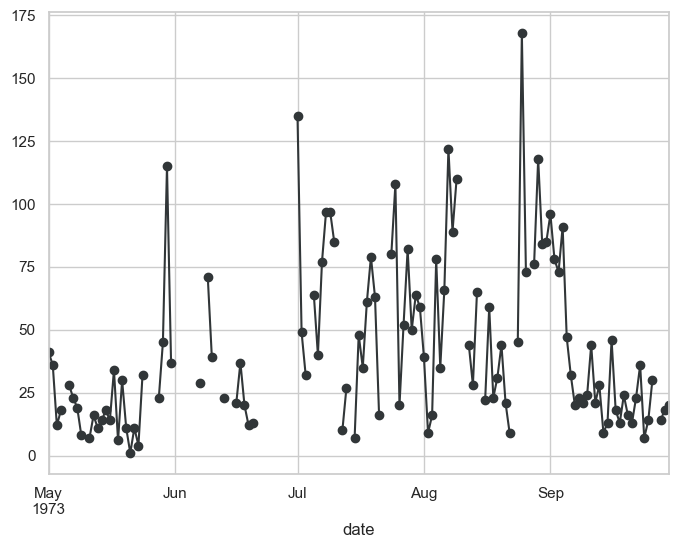

In [149]:
airquality.select_columns('ozone').pipe(lambda df: df.ozone.plot(color='#313638',marker='o'))

(<AxesSubplot: xlabel='date'>,
 <AxesSubplot: xlabel='date'>,
 <AxesSubplot: xlabel='date'>,
 <AxesSubplot: xlabel='date'>)

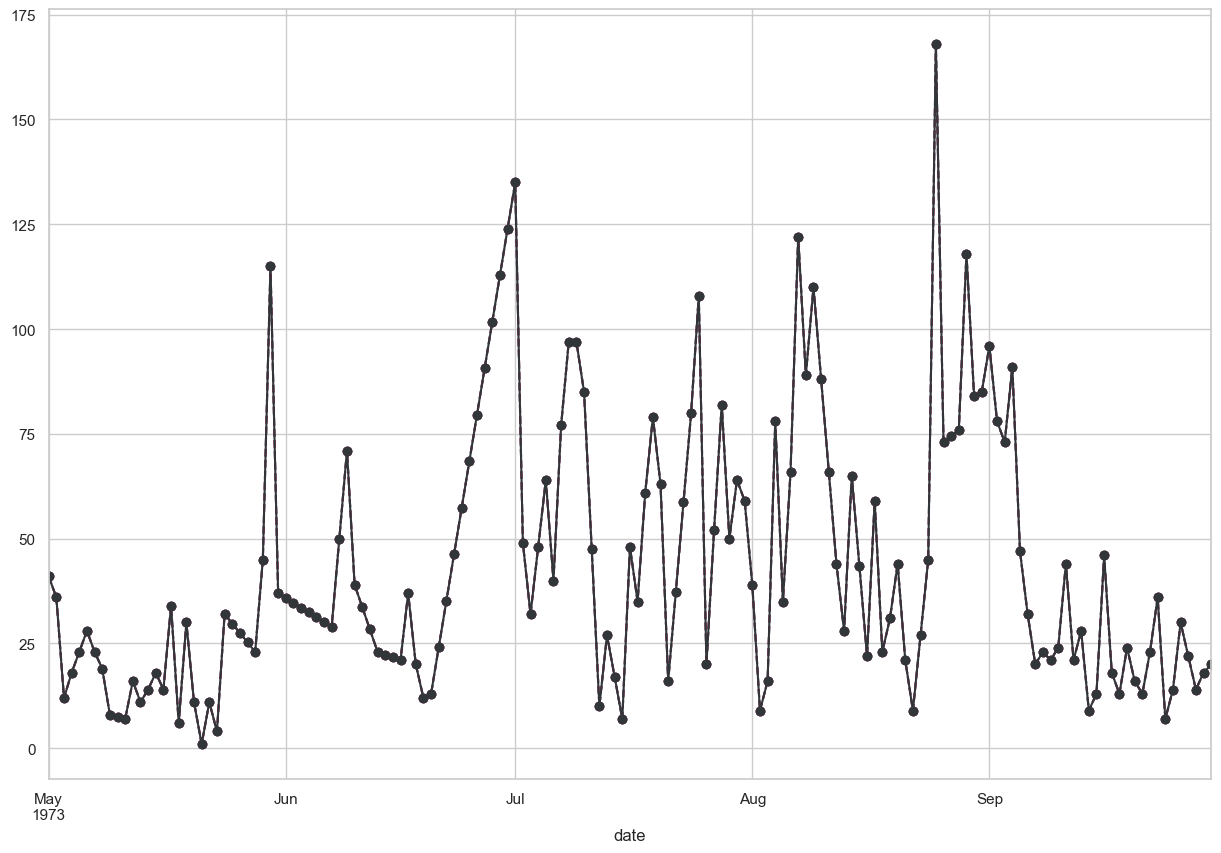

In [171]:
plt.figure(figsize=(15,10))
airquality.select_columns('ozone').pipe(lambda df: (df.ozone.interpolate(method='nearest').plot(color='green',linestyle='dashed',marker='o',alpha=6/9),
                                                    df.ozone.bfill().plot(color='blue',linestyle='dashed',marker='o',alpha=6/9),
                                                    df.ozone.ffill().plot(color='red',linestyle='dashed',marker='o',alpha=6/9),
                                                    df.ozone.plot(color='#313638',marker='o')))

In [167]:
airquality['ozone'] = airquality.ozone.interpolate(method='linear')

In [172]:
airquality.drop(columns=['ozono'])

,ozone,solar_r,wind,temp,month,day,year
date,,,,,,,
1973-05-01,41.0,190.0,7.4,67,5,1,1973
1973-05-02,36.0,118.0,8.0,72,5,2,1973
1973-05-03,12.0,149.0,12.6,74,5,3,1973
1973-05-04,18.0,313.0,11.5,62,5,4,1973
1973-05-05,23.0,NaN,14.3,56,5,5,1973
...,...,...,...,...,...,...,...
1973-09-26,30.0,193.0,6.9,70,9,26,1973
1973-09-27,22.0,145.0,13.2,77,9,27,1973
1973-09-28,14.0,191.0,14.3,75,9,28,1973


In [173]:
airquality

,ozone,solar_r,wind,temp,month,day,year,ozono
date,,,,,,,,
1973-05-01,41.0,190.0,7.4,67,5,1,1973,41.0
1973-05-02,36.0,118.0,8.0,72,5,2,1973,36.0
1973-05-03,12.0,149.0,12.6,74,5,3,1973,12.0
1973-05-04,18.0,313.0,11.5,62,5,4,1973,18.0
1973-05-05,23.0,NaN,14.3,56,5,5,1973,23.0
...,...,...,...,...,...,...,...,...
1973-09-26,30.0,193.0,6.9,70,9,26,1973,30.0
1973-09-27,22.0,145.0,13.2,77,9,27,1973,22.0
1973-09-28,14.0,191.0,14.3,75,9,28,1973,14.0


## Imputación por algoritmo de vecinos más cercanos (KNN)

Es de los más famosos.

Identificar valores faltantes, luego:
1. Encontrar otras K observaciones (donadores o vecinos) que sean más similares a esa observación
2. Reemplaza los valores faltantes ocn los valores agregados de los K vecinos.

Se busca minimizar la distancia entre los puntos, por ejemplo Euclidiana para numéricos y para las categóricas la Hamming. Esto se puede poder juntar en una métrica conocida como la distancia de Gower. Útil para ambos casos.

* Pros: sencillo de implementar, buen rendmimento de los conjuntos pequeños, excelente para numéricos.
* Cons: escalabilidad comprometedora, requiere transformaciones especiales para las variables categóricas; tiene sensibilidad a los atípicos y podría inclusive sobre ajustarse.

In [174]:
nhanes_df

,height,weight,general_health_condition,total_cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
93709.0,62.0,200.0,NaN,176.0,74.0,0,75.0,Female
93711.0,69.0,142.0,Very good,238.0,62.0,0,56.0,Male
...,...,...,...,...,...,...,...,...
102949.0,72.0,180.0,Excellent,201.0,96.0,0,33.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


In [177]:
nhanes_transformed_df

,general_health_condition,gender,height,weight,total_cholesterol,pulse,diabetes,age
SEQN,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,2.0,1.0,NaN,NaN,189.0,100.0,0.0,13.0
93709.0,NaN,0.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


In [179]:
knn_imputer = sklearn.impute.KNNImputer()

nhanes_knn = nhanes_transformed_df.copy(deep = True)

nhanes_knn.iloc[:,:] = knn_imputer.fit_transform(nhanes_transformed_df).round()
nhanes_knn

,general_health_condition,gender,height,weight,total_cholesterol,pulse,diabetes,age
SEQN,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,2.0,1.0,69.0,130.0,189.0,100.0,0.0,13.0
93709.0,2.0,0.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


<AxesSubplot: xlabel='height', ylabel='weight'>

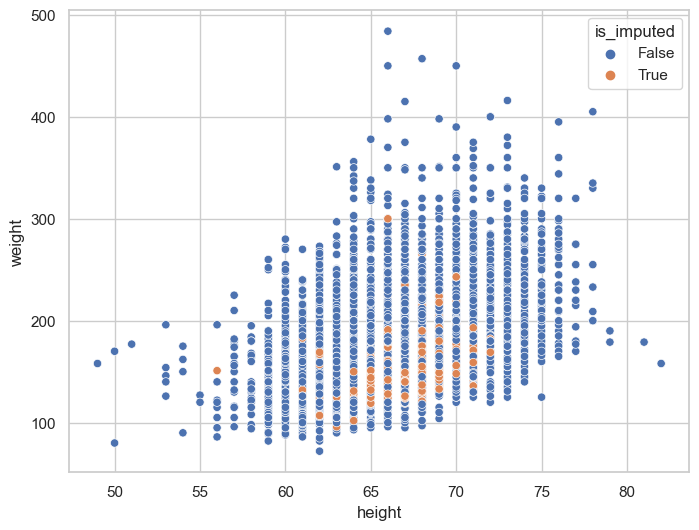

In [183]:
pd.concat([nhanes_knn,
         nhanes_df.missing.create_shadow_matrix(True,False,suffix='_imp', only_missing=True)],axis=1).missing.scatter_imputation_plot(x='height',y='weight')

### Ordenamiento por cantidad de variables faltantes

In [184]:
knn_imputer = sklearn.impute.KNNImputer()

nhanes_knn = nhanes_transformed_df.missing.sort_variables_by_missingness(ascending=True).copy(deep = True)

nhanes_knn.iloc[:,:] = knn_imputer.fit_transform(nhanes_transformed_df.missing.sort_variables_by_missingness(ascending=True).copy(deep = True)).round()
nhanes_knn

,gender,diabetes,age,pulse,total_cholesterol,general_health_condition,weight,height
SEQN,,,,,,,,
93705.0,0.0,0.0,66.0,52.0,157.0,2.0,165.0,63.0
93706.0,1.0,0.0,18.0,82.0,148.0,4.0,145.0,68.0
93707.0,1.0,0.0,13.0,100.0,189.0,2.0,130.0,69.0
93709.0,0.0,0.0,75.0,74.0,176.0,2.0,200.0,62.0
93711.0,1.0,0.0,56.0,62.0,238.0,4.0,142.0,69.0
...,...,...,...,...,...,...,...,...
102949.0,1.0,0.0,33.0,96.0,201.0,0.0,180.0,72.0
102953.0,1.0,0.0,42.0,78.0,182.0,1.0,218.0,65.0
102954.0,0.0,0.0,41.0,78.0,172.0,2.0,150.0,66.0


<AxesSubplot: xlabel='height', ylabel='weight'>

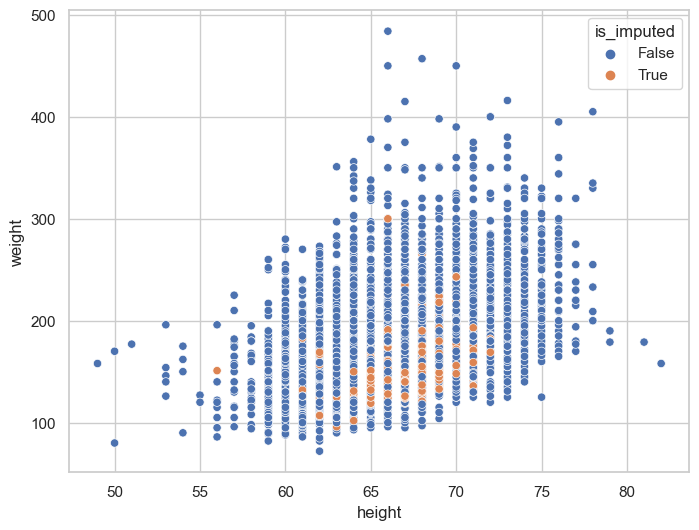

In [187]:
pd.concat([nhanes_knn,
         nhanes_df.missing.create_shadow_matrix(True,False,suffix='_imp', only_missing=True)],axis=1).missing.scatter_imputation_plot(x='height',y='weight')

## Imputación basada en modelos

* Pros: Mejora sobre la imputación basada en donante sencilla como lo puede ser mediana o moda; gran variedad de opcionez para imputar; preservación de relaciones entre valores.

* Cons: Puede subestimar la varianza; los modelos funcionan mal si las variables observadas y faltantes son independientes. Más complicado que la imputación basada en donantes. 

In [210]:
nhanes_model = nhanes_df.select_columns('height','weight','gender','age').sort_values(by='height').transform_column('weight',
                                                                                                    lambda x: x.ffill(),
                                                                                                    elementwise=False).missing.bind_shadow_matrix(True,False,suffix='_imp',
                                                                                                                                                 only_missing=False)

In [211]:
nhanes_model

,height,weight,gender,age,height_imp,weight_imp,gender_imp,age_imp
SEQN,,,,,,,,
94940.0,49.0,158.0,Female,80.0,False,False,False,False
96508.0,50.0,170.0,Female,46.0,False,False,False,False
97877.0,50.0,80.0,Female,29.0,False,False,False,False
102379.0,51.0,177.0,Female,71.0,False,False,False,False
93816.0,53.0,146.0,Female,80.0,False,False,False,False
...,...,...,...,...,...,...,...,...
102915.0,NaN,107.0,Female,14.0,True,False,False,False
102926.0,NaN,107.0,Female,15.0,True,False,False,False
102941.0,NaN,107.0,Female,14.0,True,False,False,False


In [212]:
height_ols = nhanes_model.pipe(lambda df: smf.ols('height ~ weight + gender + age',data=df)).fit()

In [213]:
ols_imputed_values = nhanes_model.pipe(lambda df: df[df.height.isna()]).pipe(lambda df: height_ols.predict(df).round())

In [214]:
nhanes_model.loc[nhanes_model.height.isna(),['height']] = ols_imputed_values

In [215]:
nhanes_model

,height,weight,gender,age,height_imp,weight_imp,gender_imp,age_imp
SEQN,,,,,,,,
94940.0,49.0,158.0,Female,80.0,False,False,False,False
96508.0,50.0,170.0,Female,46.0,False,False,False,False
97877.0,50.0,80.0,Female,29.0,False,False,False,False
102379.0,51.0,177.0,Female,71.0,False,False,False,False
93816.0,53.0,146.0,Female,80.0,False,False,False,False
...,...,...,...,...,...,...,...,...
102915.0,63.0,107.0,Female,14.0,True,False,False,False
102926.0,63.0,107.0,Female,15.0,True,False,False,False
102941.0,63.0,107.0,Female,14.0,True,False,False,False


<AxesSubplot: xlabel='weight', ylabel='height'>

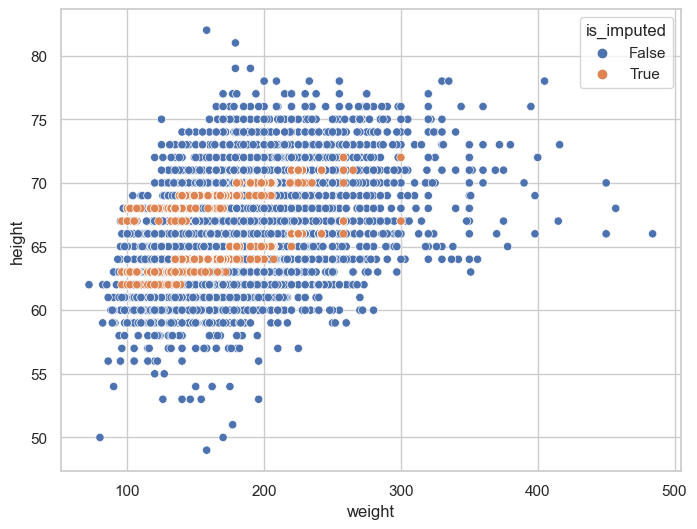

In [216]:
nhanes_model.missing.scatter_imputation_plot(x='weight',y='height')

## Imputaciones Múltiples por Ecuaciones Encadenadas (MICE)

Es un algoritmo que preserva las relaciones de las variables, por eso es superior a las imputaciones simples


1. Datos incompletos

>MICE

2. Datos imputados

>with()

3. Análisis de resultados

>pool()

4. Resultados agrupados


Hay muchas variables que pueden faltar o no. Si es una única la que no tiene valores, es decir, todas bien menos una, se puede predecir dicho valor en función de las demás variables. Es un loop que se puede hacer tantas veces sea necesario.


* Pros: Mantiene la distribución relativa similar antes y después de la imputación, puede ser utilizada en cualquier tipo de análisis; múltiples variables son imputadas.  PUEDE SER UTILIZADO EN MNAR, MCAR Y MAR, aunque podría no ser la mejor opción.

* Cons: Para funcionar bien, necesitas pensar en el modelo de imputación y el modelo de análisis; sólo funciona como los métodos de imputación seleccionados.

In [217]:
mice_imputer = sklearn.impute.IterativeImputer(estimator=BayesianRidge(),
                                              initial_strategy='mean',
                                              imputation_order='ascending')

In [220]:
nhanes_mice = nhanes_transformed_df.copy(deep=True)

nhanes_mice.iloc[:,:] = mice_imputer.fit_transform(nhanes_transformed_df).round()

In [221]:
nhanes_mice

,general_health_condition,gender,height,weight,total_cholesterol,pulse,diabetes,age
SEQN,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,2.0,1.0,70.0,200.0,189.0,100.0,0.0,13.0
93709.0,2.0,0.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


In [223]:
nhanes_mice_df = pd.concat([nhanes_mice,nhanes_df.missing.create_shadow_matrix(True,False,suffix='_imp')],axis=1)

<AxesSubplot: xlabel='height', ylabel='weight'>

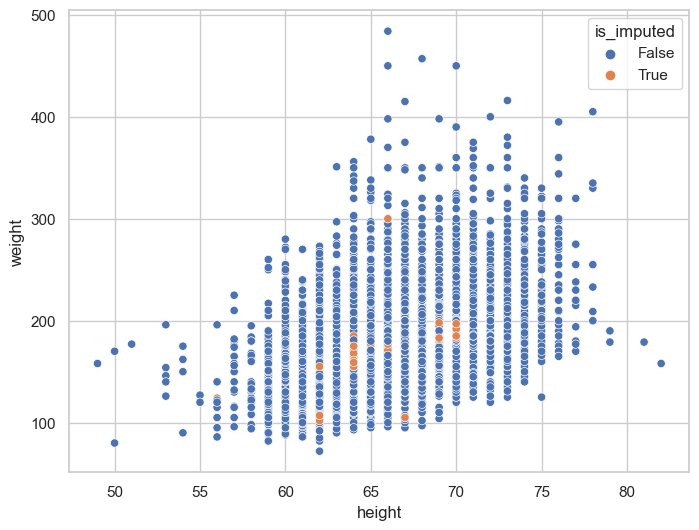

In [226]:
nhanes_mice_df.missing.scatter_imputation_plot(x='height',y='weight')

## Transformación inversa de los datos

In [229]:
transformacion = nhanes_mice_df.copy(deep=True)

In [234]:
transformacion[categorical_columns]=categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X= nhanes_mice_df[categorical_columns])

In [235]:
transformacion

,general_health_condition,gender,height,weight,total_cholesterol,pulse,diabetes,age,height_imp,weight_imp,general_health_condition_imp,total_cholesterol_imp,pulse_imp,diabetes_imp,age_imp,gender_imp
SEQN,,,,,,,,,,,,,,,,
93705.0,Good,Female,63.0,165.0,157.0,52.0,0.0,66.0,False,False,False,False,False,False,False,False
93706.0,Very good,Male,68.0,145.0,148.0,82.0,0.0,18.0,False,False,False,False,False,False,False,False
93707.0,Good,Male,70.0,200.0,189.0,100.0,0.0,13.0,True,True,False,False,False,False,False,False
93709.0,Good,Female,62.0,200.0,176.0,74.0,0.0,75.0,False,False,True,False,False,False,False,False
93711.0,Very good,Male,69.0,142.0,238.0,62.0,0.0,56.0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,Excellent,Male,72.0,180.0,201.0,96.0,0.0,33.0,False,False,False,False,False,False,False,False
102953.0,Fair or,Male,65.0,218.0,182.0,78.0,0.0,42.0,False,False,False,False,False,False,False,False
102954.0,Good,Female,66.0,150.0,172.0,78.0,0.0,41.0,False,False,False,False,False,False,False,False


In [236]:
nhanes_df.general_health_condition.value_counts()

Good         2383
Very good    1503
Fair or      1130
Excellent     612
Poor?         169
Name: general_health_condition, dtype: int64

In [237]:
transformacion.general_health_condition.value_counts()

Good         3743
Very good    1503
Fair or      1130
Excellent     612
Poor?         169
Name: general_health_condition, dtype: int64

In [238]:
transformacion.missing.number_missing()

0

## Continúa aprendiendo sobre el manejo de valores faltantes

<div class="alert alert-success">
    <b style="font-size: 1.5em;">✅ ¡Felicidades por terminar el curso!</b>
    <p>
    ¡Tu progreso es increíble! ¡Ahora eres capaz de llevar tus análisis al siguiente nivel! La barrera de los valores faltantes ya no es una limitante extrema para tu trabajo. Tú puedes explorar valores faltantes, eliminarlos e imputarlos siendo consciente de las ventajas y desventajas de cada método elegido. ¡Fantástico!
    </p>
    <p>
    <b>¿Cómo puedo continuar mi aprendizaje en el análisis de valores faltantes?</b>
    Poner en práctica lo aprendido es una excelente opción. Por lo tanto, te recomiendo repetir este curso utilizando la totalidad de los datos del <i>National Health and Nutrition Examination Survey</i>. Con este proyecto, serás capaz de explorar y analizar una cantidad de valores faltantes variadas. Podrás probar distintos algoritmos y estrategias. 
    </p>
    <p>
    De tal forma de que, una vez consigas tu conjunto de datos final, puedas proceder a la exploración definitiva del conjunto de datos para extraer ideas y respuestas a preguntas de tu interés. Incluso, y por qué no, podrías explorar la posibilidad de crear modelos predictivos para la diabetes. Las opciones son ilimitadas. Bienvenido al mundo de la Ciencia de Datos.
    </p>
    <p>
    Con mucha alegría por tu logro,
    Jesús Vélez Santiago
    </p>
</div>

In [1]:
4 != 10

True

## Información de sesión

In [239]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>